# EDA on the given datasets


##  Parsing the dataset

In [7]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df_train = pd.read_csv("/content/sample_data/train_data.csv")

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df_train.shape[0]))

# Display 10 random rows from the data.
df_train.head()

Number of training sentences: 19,998



,input,labels
0,I am reading score of Mahler is Symphony No . .,0
1,I am not interested in cars or electric applia...,1
2,This is my homework for my English class .,0
3,"In comparison , Canada is catches increased an...",0
4,"Fortunately , my older sister is friend is a d...",1


In [8]:
# Load the dataset into a pandas dataframe.
df_val = pd.read_csv("/content/sample_data/val_data.csv")

# Report the number of sentences.
print('Number of val sentences: {:,}\n'.format(df_val.shape[0]))

# Display 10 random rows from the data.
df_val.head()

Number of val sentences: 10,000



,input,labels
0,It was the same thing .,0
1,I can study idioms a lot,1
2,I just bet some coins for numbers or colors .,0
3,"Yesterday , I was checking some e - mails on b...",1
4,I regret that I have not played the piano very...,1


In [9]:
# Load the dataset into a pandas dataframe.
df_test = pd.read_excel("/content/sample_data/test_data.xlsx")

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df_test.shape[0]))

# Display 10 random rows from the data.
df_test.head()

Number of test sentences: 10,000



,input
0,I believe they will master Japanese soon becau...
1,I am looking for it .
2,Apple is a round fruit with smooth and colorfu...
3,Let It Will Be Push .
4,I rode on this ship from Sendai .


The two properties we actually care about are the the `input` sentence and its `label`, which is referred to as the "whether it is grammatically correct or not" (0=unacceptable, 1=acceptable).

# Performing EDA on the 3 datasets

## Downloading nltk packages

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Train set

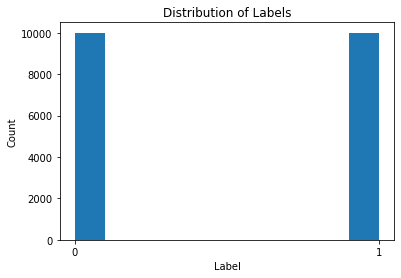

Average sentence length: count    19998.000000
mean        11.640114
std          7.666548
min          0.000000
25%          7.000000
50%         10.000000
75%         15.000000
max        319.000000
Name: sentence_length, dtype: float64
Most common words: [('.', 15897), ('I', 10829), (',', 8553), ('the', 6447), ('to', 6379), ('a', 4656), ('is', 4648), ('and', 3777), ('of', 3219), ('in', 3138)]


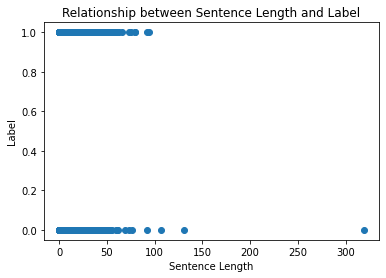

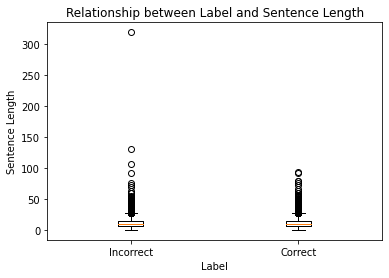

In [11]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Load the dataset
data = df_train

# Check the distribution of labels
plt.hist(data['labels'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

# Check the length of sentences
data['sentence_length'] = data['input'].apply(lambda x: len(word_tokenize(x)))
print('Average sentence length:', data['sentence_length'].describe())

# Check the most common words
all_words = []
for sentence in data['input']:
    words = word_tokenize(sentence)
    all_words.extend(words)

freq_dist = FreqDist(all_words)
print('Most common words:', freq_dist.most_common(10))

# Visualize the relationship between variables
plt.scatter(data['sentence_length'], data['labels'])
plt.title('Relationship between Sentence Length and Label')
plt.xlabel('Sentence Length')
plt.ylabel('Label')
plt.show()

plt.boxplot([data[data['labels'] == 0]['sentence_length'], data[data['labels'] == 1]['sentence_length']])
plt.title('Relationship between Label and Sentence Length')
plt.xlabel('Label')
plt.ylabel('Sentence Length')
plt.xticks([1, 2], ['Incorrect', 'Correct'])
plt.show()

## Validation set

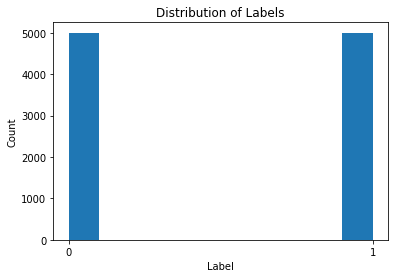

Average sentence length: count    10000.000000
mean        11.745900
std          7.606045
min          0.000000
25%          7.000000
50%         10.000000
75%         15.000000
max        133.000000
Name: sentence_length, dtype: float64
Most common words: [('.', 7979), ('I', 5413), (',', 4393), ('to', 3361), ('the', 3285), ('a', 2363), ('is', 2301), ('and', 1959), ('of', 1530), ('in', 1520)]


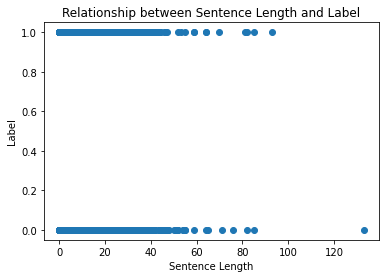

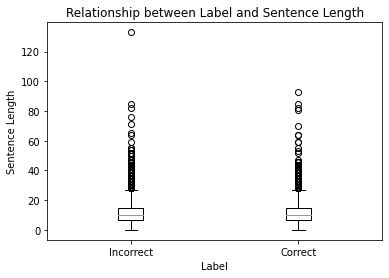

In [12]:
data = df_val

# Check the distribution of labels
plt.hist(data['labels'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

# Check the length of sentences
data['sentence_length'] = data['input'].apply(lambda x: len(word_tokenize(x)))
print('Average sentence length:', data['sentence_length'].describe())

# Check the most common words
all_words = []
for sentence in data['input']:
    words = word_tokenize(sentence)
    all_words.extend(words)

freq_dist = FreqDist(all_words)
print('Most common words:', freq_dist.most_common(10))

# Visualize the relationship between variables
plt.scatter(data['sentence_length'], data['labels'])
plt.title('Relationship between Sentence Length and Label')
plt.xlabel('Sentence Length')
plt.ylabel('Label')
plt.show()

plt.boxplot([data[data['labels'] == 0]['sentence_length'], data[data['labels'] == 1]['sentence_length']])
plt.title('Relationship between Label and Sentence Length')
plt.xlabel('Label')
plt.ylabel('Sentence Length')
plt.xticks([1, 2], ['Incorrect', 'Correct'])
plt.show()

## Test set

In [13]:
data = df_test
# sentences = data['input'].tolist()
# apply word_tokenize to each sentence
# Check the length of sentences
df_test['input'] = df_test['input'].astype(str)
data['sentence_length'] = data['input'].apply(lambda x: len(word_tokenize(x)))
print('Average sentence length:', data['sentence_length'].describe())

# Check the most common words
all_words = []
for sentence in data['input']:
    words = word_tokenize(sentence)
    all_words.extend(words)

freq_dist = FreqDist(all_words)
print('Most common words:', freq_dist.most_common(10))

Average sentence length: count    10000.000000
mean        11.716600
std         11.109034
min          1.000000
25%          7.000000
50%         10.000000
75%         15.000000
max        841.000000
Name: sentence_length, dtype: float64
Most common words: [('.', 7976), ('I', 5524), (',', 4238), ('to', 3354), ('the', 3171), ('a', 2336), ('is', 2300), ('and', 1935), ('of', 1542), ('in', 1528)]


# Annotation errors in Train and Validation sets

## Train set

In [19]:
df_train.iloc[4]

input              Fortunately , my older sister is friend is a d...
labels                                                             1
sentence_length                                                   11
Name: 4, dtype: object

We can clearly see this is a False Positive, as the sentence is grammatically *incorrect* "sister is friend is a dentist".

In [20]:
df_train.iloc[20]

input              Please correct my mistakes .
labels                                        0
sentence_length                               5
Name: 20, dtype: object

We can clearly see this is a False Negative, as the sentence is grammatically *correct*.

## Validation Set

In [21]:
df_val.iloc[51]

input              Becuse I .
labels                      1
sentence_length             3
Name: 51, dtype: object

We can clearly see this is a False Positive, as the sentence is grammatically *incorrect* "Becuse I", with a spelling mistake

In [22]:
df_val.iloc[20]

input              But I do not know what to do .
labels                                          0
sentence_length                                 9
Name: 20, dtype: object

We can clearly see this is a False Negative, as the sentence is grammatically *correct*.